# Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Datasets

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Column Descriptions
- PassengerId: Unique Id of a passenger
- Survived: Survived (1) or died (0)
- Pclass: Ticket class (1st - Upper, 2nd - Middle, or 3rd - Lower)
- Age: Age of the Passenger; Fractional if Age less than one (1).
- SibSp: Number of siblings/spouses traveling with the passenger
- Parch: Number of parents/children traveling with the passenger
- Ticket: Ticket number
- Fare: Passenger Fare
- Cabin: Cabin number
- Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Cleaning

<Axes: >

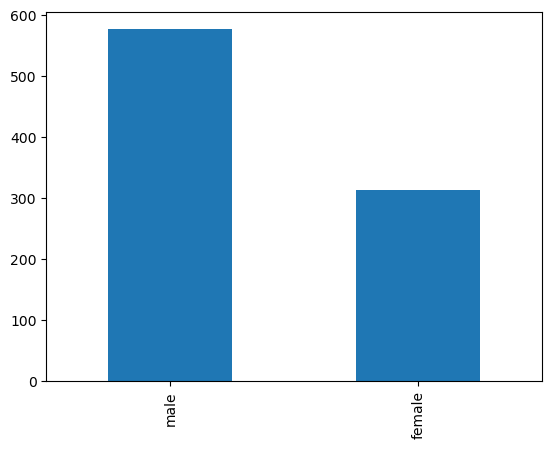

In [19]:
train.Sex.value_counts().plot(kind='bar', alpha=1)

<Axes: >

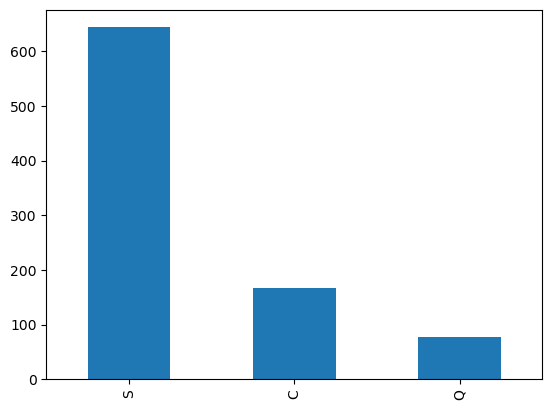

In [20]:
train.Embarked.value_counts().plot(kind='bar')

In [26]:
# checking the number of missing values
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [29]:
print(train.isnull().sum()["Cabin"]/ len(train))

0.7710437710437711


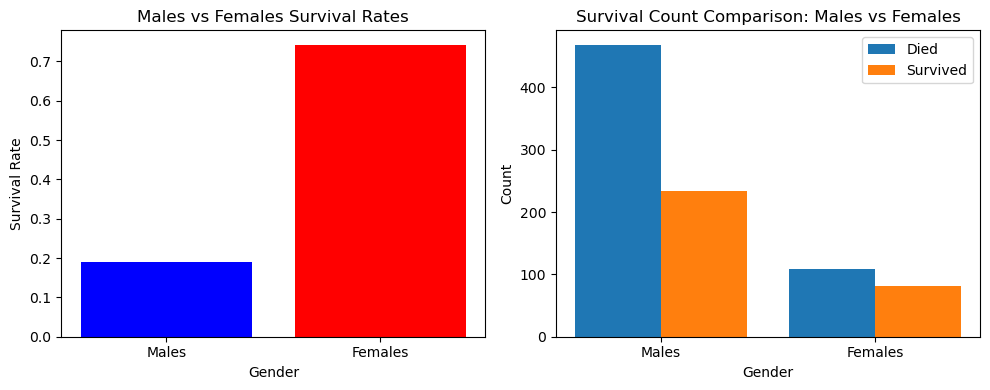

In [23]:
# basic visualizations to understand the data

males = train[train['Sex'] == "male"]
females = train[train['Sex'] == "female"]

# computing survival rates for both
male_survival_rate = males["Survived"].mean()
female_survival_rate = females["Survived"].mean()

male_survival_counts = males["Survived"].value_counts()
female_survival_counts = females["Survived"].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].bar(["Males", "Females"], [male_survival_rate, female_survival_rate], color=["blue", "red"])
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Survival Rate")
axes[0].set_title("Males vs Females Survival Rates")

bar_positions = np.arange(2)
bar_width = 0.4
axes[1].bar(bar_positions - bar_width/2, male_survival_counts, bar_width, label='Died')
axes[1].bar(bar_positions + bar_width/2, female_survival_counts, bar_width, label='Survived')
axes[1].set_title('Survival Count Comparison: Males vs Females')
axes[1].set_xticks(bar_positions)
axes[1].set_xticklabels(['Males', 'Females'])
axes[1].set_xlabel("Gender")
axes[1].legend()
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()